In [136]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


LOADING DATASET

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
theme_colors = ['#F9B1B8',  '#EE4355',  '#B60618','#820815']
color_palette = ['#FFFFFF', '#F9B1B8', '#EE4355', '#B60618', '#820815', '#000000']
warnings.filterwarnings('ignore')

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [138]:
# --- Importing Dataset ---
df = pd.read_csv("/content/gdrive/MyDrive/SML Project/data/heart.csv")

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.000000,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.000000,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.500000,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.000000,Up,0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [140]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No Missing Values

In [141]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


DATA VIS

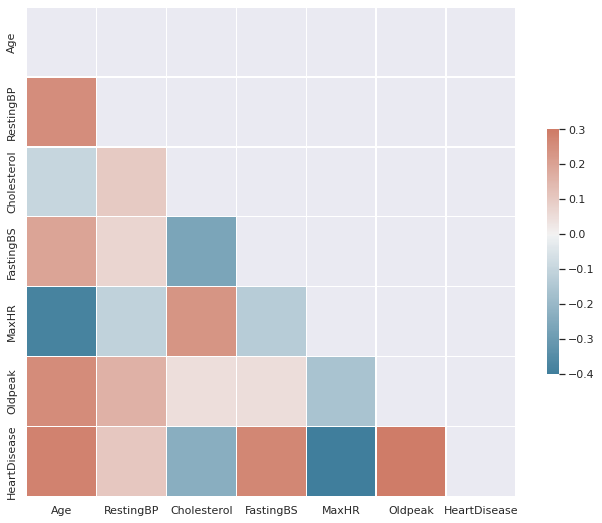

In [142]:
# compute the corr matrix

corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr,dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5,cbar_kws={'shrink':.5})

M    725
F    193
Name: Sex, dtype: int64


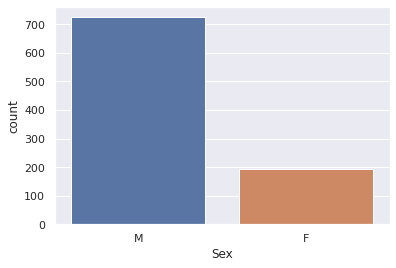

In [143]:
print(df.Sex.value_counts())
sns.set_theme(style='darkgrid')
ax = sns.countplot(data=df,x='Sex')

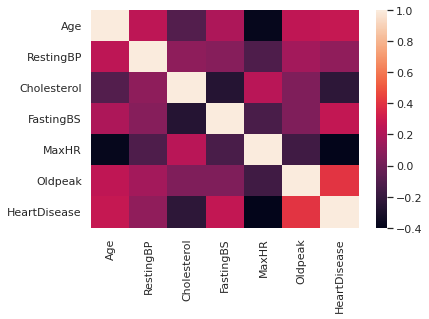

In [144]:
# df=df.drop(columns = ['id'])
data_cor = df.corr()
sns.heatmap(data_cor)
data_df_upper = data_cor.where(np.triu(np.ones(data_cor.shape, dtype=int), k=1).astype(bool))
cor80 = [col for col in data_df_upper.columns if any(abs(data_df_upper[col]) >= 0.8)]

DATA PREPROCESS

In [145]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [146]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [147]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (918, 10)
Y Shape (918,)


In [148]:
st_slope_count = df.groupby(['ST_Slope']).size().reset_index().rename(columns={0: 'count'})
st_slope_count

,ST_Slope,count
0,0,63
1,1,460
2,2,395


In [149]:
df = df[df['RestingBP'] != 0]



In [150]:
sex_count = df.groupby(['Sex']).size().reset_index().rename(columns={0: 'count'})
cp_count = df.groupby(['ChestPainType']).size().reset_index().rename(columns={0: 'count'})
fasting_bs_count = df.groupby(['FastingBS']).size().reset_index().rename(columns={0: 'count'})
resting_ecg_count = df.groupby(['RestingECG']).size().reset_index().rename(columns={0: 'count'})
angina_count = df.groupby(['ExerciseAngina']).size().reset_index().rename(columns={0: 'count'})
st_slope_count = df.groupby(['ST_Slope']).size().reset_index().rename(columns={0: 'count'})

fig = make_subplots(rows=3, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]
                          ])


## Sex Donut Chart
fig.add_trace(
    go.Pie(
        labels=sex_count['Sex'],
        values=sex_count['count'],
        hole=.6,
        title='Sex',
        titlefont={'color':None, 'size': 24},       
        ),
    row=1,col=1
    )

## Chest Pain Type Donut Chart
fig.add_trace(
    go.Pie(
        labels=cp_count['ChestPainType'],
        values=cp_count['count'],
        hole=.6,
        title='Chest Pain Type',
        titlefont={'color':None, 'size': 24},
        ),
    row=1,col=2
    )

## Fasting Blood Sugar Donut Chart
fig.add_trace(
    go.Pie(
        labels=fasting_bs_count['FastingBS'],
        values=fasting_bs_count['count'],
        hole=.6,
        title='Fasting Blood Sugar',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=1
    )


## RestingECG Donut Chart
fig.add_trace(
    go.Pie(
        labels=resting_ecg_count['RestingECG'],
        values=resting_ecg_count['count'],
        hole=.6,
        title='Resting ECG',
        titlefont={'color':None, 'size': 24},
        ),
    row=2,col=2
    )

## ExerciseAngina Donut Chart
fig.add_trace(
    go.Pie(
        labels=angina_count['ExerciseAngina'],
        values=angina_count['count'],
        hole=.6,
        title='Exercise Angina',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=1
    )

## ST_Slope Donut Chart
fig.add_trace(
    go.Pie(
        labels=st_slope_count['ST_Slope'],
        values=st_slope_count['count'],
        hole=.6,
        title='ST Slope',
        titlefont={'color':None, 'size': 24},
        ),
    row=3,col=2
    )

fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=theme_colors,
        line=dict(color='#EEEEEE',
                  width=2)
        )
    )


fig.layout.update(title="<b> Categorical Features Donut Charts <b>",
                  titlefont={'color':None, 'size': 24, 'family': 'Courier New'},
                  showlegend=False, 
                  height=1000, 
                  width=1000,
#                   paper_bgcolor="#333333",
                  template='plotly_dark',
                  title_x=0.5
                  )
fig.show()

In [151]:
fig=make_subplots(rows=2,cols=2,subplot_titles=('<i>Age', '<i>Resting BP', '<i>Cholesterol', '<i>MaxHR'))
fig.add_trace(go.Histogram(x=df['Age'],name='Age'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['RestingBP'],name='RestingBP'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['Cholesterol'],name='Cholesterol'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['MaxHR'],name='MaxHR'),row=2,col=2)

fig.update_layout(height=600, width=1000, title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New')

In [152]:
fig = px.density_heatmap(
    df, x='Age', y='RestingBP',
    marginal_x='histogram', marginal_y='histogram', histfunc='count'
)

fig.update_layout(
    title="Resting Blood Pressure X Age Groups Density Plot",
    xaxis_title="Age Groups",
    yaxis_title="Resting Blood Pressure",
    font=dict(
        family="Rubik",
        size=14
    )
)

fig.show()

In [153]:
fig = px.density_heatmap(
    df, x='Age', y='Cholesterol',
    marginal_x='histogram', marginal_y='histogram', histfunc='count'
)

fig.update_layout(
    title="Cholesterol X Age Groups Density Plot",
    xaxis_title="Age Groups",
    yaxis_title="Cholesterol",
    font=dict(
        family="Rubik",
        size=14
    )
)

fig.show()

In [154]:
fig = px.density_heatmap(
    df, x='Age', y='MaxHR',
    marginal_x='histogram', marginal_y='histogram', histfunc='count'
)

fig.update_layout(
    title="Max Heart Rate X Age Groups Density Plot",
    xaxis_title="Age Groups",
    yaxis_title="Max Heart Rate",
    font=dict(
        family="Rubik",
        size=14
    )
)

fig.show()

In [155]:
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

In [156]:
fig = px.histogram(df, x="Age", color="HeartDisease", marginal="violin", template='plotly_dark')

fig.update_layout(title_text="Age vs Heart Disease", title_x=0.5, height=500, template='plotly_dark',
        font=dict(
            family="Rubik",
            size=14)
)

fig.show()

In [157]:
fig = px.histogram(df, x="MaxHR", color="HeartDisease", marginal="violin", template='plotly_dark')

fig.update_layout(title_text="Max Heart Rate vs Heart Disease", title_x=0.5, height=500, template='plotly_dark',
        font=dict(
            family="Rubik",
            size=14)
)

fig.show()

In [158]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [159]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

print('Number transations x_train df',X_train.shape)
print('Number transations x_test df',X_test.shape)
print('Number transations y_train df',y_train.shape)
print('Number transations y_test df',y_test.shape)

Number transations x_train df (734, 15)
Number transations x_test df (184, 15)
Number transations y_train df (734,)
Number transations y_test df (184,)


In [160]:
# SMOTE 
# pip install imblearn
# from imblearn.over_sampling import SMOTE
print('Before OverSampling, the shape of train_x: ',X_train.shape)
print('Before OverSampling, the shape of train_y: ',y_train.shape)
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, the shape of train_x:  (734, 15)
Before OverSampling, the shape of train_y:  (734,)
Before OverSampling, counts of label 1: 401
Before OverSampling, counts of label 0: 333 



In [161]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))

print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))

After OverSampling, the shape of train_x: (802, 15)
After OverSampling, the shape of train_y: (802,)
After OverSampling, counts of label 1: 401
After OverSampling, counts of label 0: 401


MODEL SELECTION

In [162]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVM',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
# models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
# models.append(['AdaBoostClassifier',AdaBoostClassifier()])

Without SMOTE

In [163]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    # cm = confusion_matrix(y_test,y_pred)

    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    # print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('K-Fold Validation Max Accuracy: {:.2f} %'.format(accuracies.max()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.max()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
Accuracy Score:  0.875

K-Fold Validation Mean Accuracy: 87.06 %

K-Fold Validation Max Accuracy: 91.78 %

Standard Deviation: 3.57 %

ROC AUC Score: 0.87 %

Precision: 0.88 %

Recall: 0.92 %

F1 Score: 0.89 %
----------------------------------------

Logistic Regression :
Accuracy Score:  0.8206521739130435

K-Fold Validation Mean Accuracy: 85.83 %

K-Fold Validation Max Accuracy: 93.15 %

Standard Deviation: 4.28 %

ROC AUC Score: 0.81 %

Precision: 0.83 %

Recall: 0.87 %

F1 Score: 0.85 %
----------------------------------------

SVM :
Accuracy Score:  0.7010869565217391

K-Fold Validation Mean Accuracy: 72.05 %

K-Fold Validation Max Accuracy: 82.43 %

Standard Deviation: 6.06 %

ROC AUC Score: 0.70 %

Precision: 0.77 %

Recall: 0.70 %

F1 Score: 0.73 %
----------------------------------------

KNeigbors :
Accuracy Score:  0.6630434782608695

K-Fold Validation Mean Accuracy: 69.06 %

K-Fold Validation Max Accuracy: 79.73 %

Standard Deviation: 6.56 %

ROC AUC Score:

In [164]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','K-Fold Max Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,K-Fold Max Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
0,XGBClassifier,87.500000,87.058497,91.780822,3.567658,0.867035,0.875000,0.915888,0.894977
6,RandomForest,86.413043,87.201037,94.520548,4.423197,0.854048,0.859649,0.915888,0.886878
4,GaussianNB,85.869565,85.414661,90.410959,4.679508,0.854837,0.878505,0.878505,0.878505
1,Logistic Regression,82.065217,85.833025,93.150685,4.282993,0.811203,0.830357,0.869159,0.849315
5,DecisionTree,78.260870,79.968530,86.301370,4.071172,0.783954,0.838384,0.775701,0.805825
2,SVM,70.108696,72.049241,82.432432,6.059902,0.701117,0.765306,0.700935,0.731707
3,KNeigbors,66.304348,69.055905,79.729730,6.559736,0.648380,0.699115,0.738318,0.718182


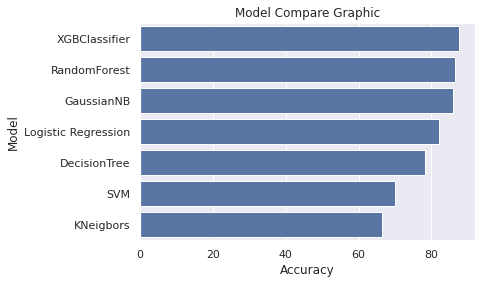

In [165]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

With SMOTE

In [166]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    # cm = confusion_matrix(y_test,y_pred)

    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    # print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('K-Fold Validation Max Accuracy: {:.2f} %'.format(accuracies.max()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.max()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
Accuracy Score:  0.8641304347826086

K-Fold Validation Mean Accuracy: 88.04 %

K-Fold Validation Max Accuracy: 93.75 %

Standard Deviation: 3.04 %

ROC AUC Score: 0.86 %

Precision: 0.87 %

Recall: 0.91 %

F1 Score: 0.89 %
----------------------------------------

Logistic Regression :
Accuracy Score:  0.8206521739130435

K-Fold Validation Mean Accuracy: 86.79 %

K-Fold Validation Max Accuracy: 93.75 %

Standard Deviation: 3.77 %

ROC AUC Score: 0.81 %

Precision: 0.84 %

Recall: 0.85 %

F1 Score: 0.85 %
----------------------------------------

SVM :
Accuracy Score:  0.6902173913043478

K-Fold Validation Mean Accuracy: 70.82 %

K-Fold Validation Max Accuracy: 77.78 %

Standard Deviation: 4.57 %

ROC AUC Score: 0.70 %

Precision: 0.78 %

Recall: 0.64 %

F1 Score: 0.71 %
----------------------------------------

KNeigbors :
Accuracy Score:  0.6739130434782609

K-Fold Validation Mean Accuracy: 71.45 %

K-Fold Validation Max Accuracy: 76.25 %

Standard Deviation: 4.38 %

R

In [167]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','K-Fold Max Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

,Model,Accuracy,K-Fold Mean Accuracy,K-Fold Max Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
0,XGBClassifier,86.413043,88.037037,93.750000,3.036571,0.855868,0.866071,0.906542,0.885845
4,GaussianNB,85.869565,86.032407,92.500000,4.932087,0.854837,0.878505,0.878505,0.878505
6,RandomForest,84.782609,87.915123,93.750000,4.107417,0.836388,0.843478,0.906542,0.873874
1,Logistic Regression,82.065217,86.790123,93.750000,3.767696,0.814844,0.842593,0.850467,0.846512
5,DecisionTree,78.260870,81.558642,88.750000,4.894282,0.789416,0.860215,0.747664,0.800000
2,SVM,69.021739,70.820988,77.777778,4.571590,0.699053,0.784091,0.644860,0.707692
3,KNeigbors,67.391304,71.449074,76.250000,4.383055,0.663187,0.715596,0.728972,0.722222


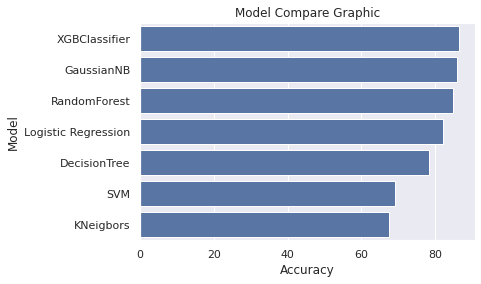

In [168]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

Model Tuning

In [169]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [170]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res,y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
    print('')
    print('-'*25)
    print('')

 XGBClassifier(): 
 Best Accuracy: 88.04 %

-------------------------

 KNeighborsClassifier(): 
 Best Accuracy: 77.07 %

-------------------------

 DecisionTreeClassifier(): 
 Best Accuracy: 82.80 %

-------------------------

 RandomForestClassifier(): 
 Best Accuracy: 88.04 %

-------------------------



              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC AUC score: 0.9259618885787111
Accuracy Score:  0.8641304347826086


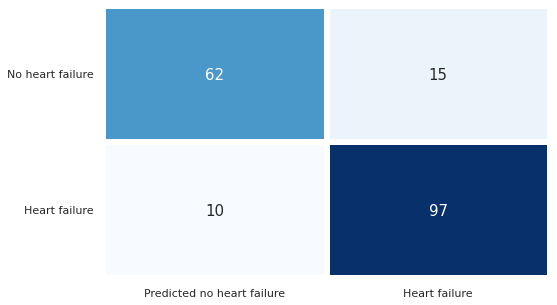

Text(0.5, 0, 'False Positive Rate')

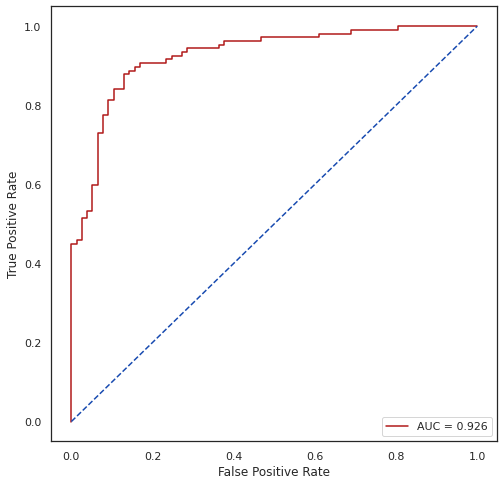

In [171]:
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No heart failure', 'Heart failure'], xticklabels = ['Predicted no heart failure', 'Heart failure'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')